<a href="https://colab.research.google.com/github/Ell-neto/Clustering/blob/main/Clustering_Basico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly==5.6.0

     |████████████████████████████████| 27.7 MB 1.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Wine2.xlsx")

In [ ]:
df.shape

(178, 14)

In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,1423,171,243,156,127,28,306,28,229,564,104,392,1065,1
1,132,178,214,112,100,265,276,26,128,438,105,34,1050,1
2,1316,236,267,186,101,28,324,3,281,568,103,317,1185,1
3,1437,195,25,168,113,385,349,24,218,78,86,345,1480,1
4,1324,259,287,21,118,28,269,39,182,432,104,293,735,1


In [ ]:
df = df.rename(columns = {'Alcohol':'Alcool', 'Ash':'Po' , 'Ash_Alcanity':'Alcalinidade_po',
                          'Magnesium':'Magnesio',	'Color_Intensity':'Intensidade_de_cor'})

In [ ]:
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,1423,171,243,156,127,28,306,28,229,564,104,392,1065,1
1,132,178,214,112,100,265,276,26,128,438,105,34,1050,1
2,1316,236,267,186,101,28,324,3,281,568,103,317,1185,1
3,1437,195,25,168,113,385,349,24,218,78,86,345,1480,1
4,1324,259,287,21,118,28,269,39,182,432,104,293,735,1


In [ ]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02,178.000000,178.000000,178.000000,178.000000
mean,1171.988764,205.926966,190.337079,107.477528,99.741573,149.471910,186.544944,30.977528,149.432584,5.585818e+04,93.904494,229.971910,746.893258,1.938202
std,374.934073,119.747381,92.441393,89.318968,14.282484,111.243113,111.606202,16.123799,65.894269,7.420182e+05,69.633073,101.656363,314.907474,0.775035
min,12.000000,9.000000,2.000000,12.000000,70.000000,2.000000,2.000000,2.000000,8.000000,2.000000e+00,1.000000,2.000000,278.000000,1.000000
25%,1210.000000,136.750000,192.000000,20.000000,88.000000,26.000000,79.250000,22.000000,107.250000,4.525000e+01,74.250000,167.250000,500.500000,1.000000
50%,1285.000000,174.000000,228.000000,113.000000,98.000000,162.000000,203.000000,29.000000,148.000000,8.650000e+01,96.000000,260.000000,673.500000,2.000000
75%,1358.000000,267.750000,248.000000,188.000000,107.000000,247.500000,276.000000,43.000000,190.750000,3.937500e+02,112.000000,312.000000,985.000000,3.000000
max,1483.000000,565.000000,323.000000,285.000000,162.000000,388.000000,508.000000,66.000000,358.000000,9.899999e+06,906.000000,392.000000,1680.000000,3.000000


In [ ]:
matriz_corr = df.corr()
matriz_corr

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
Alcool,1.000000,-0.038627,0.130488,0.155073,0.031577,-0.018266,0.001937,0.064875,-0.018133,0.021145,-0.007940,-0.033483,0.053900,-0.041065
Malic_Acid,-0.038627,1.000000,0.164408,-0.064750,-0.085985,-0.016398,-0.284040,0.132649,-0.183716,0.020844,-0.166578,-0.208511,-0.150983,0.375063
Po,0.130488,0.164408,1.000000,-0.010361,0.044856,-0.080235,-0.036416,0.051275,-0.029710,0.030723,-0.038766,-0.066207,-0.024783,-0.013744
Alcalinidade_po,0.155073,-0.064750,-0.010361,1.000000,-0.005133,-0.007722,0.082839,0.052120,0.124388,0.073897,0.129660,-0.029752,0.076338,-0.078083
Magnesio,0.031577,-0.085985,0.044856,-0.005133,1.000000,-0.069384,0.171755,-0.157112,0.137981,-0.072504,0.069076,-0.073970,0.393351,-0.209179
Total_Phenols,-0.018266,-0.016398,-0.080235,-0.007722,-0.069384,1.000000,0.279944,-0.056474,0.100733,-0.007108,-0.016141,0.051306,0.001782,-0.189824
Flavanoids,0.001937,-0.284040,-0.036416,0.082839,0.171755,0.279944,1.000000,-0.208200,0.543438,-0.091612,0.112697,0.325573,0.452558,-0.737348
Nonflavanoid_Phenols,0.064875,0.132649,0.051275,0.052120,-0.157112,-0.056474,-0.208200,1.000000,-0.093234,0.079566,-0.088848,-0.183343,-0.180431,0.278384
Proanthocyanins,-0.018133,-0.183716,-0.029710,0.124388,0.137981,0.100733,0.543438,-0.093234,1.000000,-0.097747,0.094530,0.217382,0.311550,-0.488109
Intensidade_de_cor,0.021145,0.020844,0.030723,0.073897,-0.072504,-0.007108,-0.091612,0.079566,-0.097747,1.000000,-0.039955,-0.049679,-0.066256,0.103303


In [ ]:
!pip install biokit

     |████████████████████████████████| 162 kB 14.4 MB/s 
     |████████████████████████████████| 47 kB 3.5 MB/s 
     |████████████████████████████████| 1.0 MB 56.0 MB/s 
     |████████████████████████████████| 2.3 MB 61.7 MB/s 
     |████████████████████████████████| 51 kB 6.5 MB/s 
     |████████████████████████████████| 47 kB 4.9 MB/s 
     |████████████████████████████████| 144 kB 56.8 MB/s 
     |████████████████████████████████| 5.8 MB 50.1 MB/s 
     |████████████████████████████████| 251 kB 88.0 MB/s 
     |████████████████████████████████| 127 kB 72.5 MB/s 
  Created wheel for biokit: filename=biokit-0.5.0-py3-none-any.whl size=177148 sha256=187c961f18d8595539d1303f8de0a7c3926faeaf73d3a7dd87f494f939eceb29
  Stored in directory: /root/.cache/pip/wheels/2f/30/fe/0a5e0df22f6ac201067237923fbad60309bb6f7dc68ff6b346
  Created wheel for bioservices: filename=bioservices-1.8.4-py3-none-any.whl size=231822 sha256=8ed8df2a0d41b8a99295ccaa2df5ac5d5e856ebee84763779704169309861a61
  Store

In [ ]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 


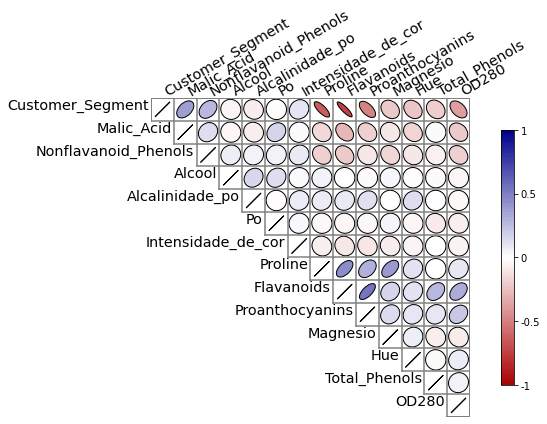

In [ ]:
corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper = 'ellipse', fontsize = 'x-large')
fig = plt.gcf()
fig.set_size_inches(13,8)
fig.show()

In [ ]:
atributos = df.columns
for atributo in atributos:
  df[atributo] = (df[atributo] - min(df[atributo]))/(max(df[atributo])-min(df[atributo]))

In [ ]:
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.959211,0.291367,0.750779,0.527473,0.619565,0.067358,0.600791,0.406250,0.631429,0.000057,0.113812,1.000000,0.561341,0.0
1,0.081577,0.303957,0.660436,0.366300,0.326087,0.681347,0.541502,0.375000,0.342857,0.000044,0.114917,0.082051,0.550642,0.0
2,0.886472,0.408273,0.825545,0.637363,0.336957,0.067358,0.636364,0.015625,0.780000,0.000057,0.112707,0.807692,0.646933,0.0
3,0.968729,0.334532,0.071651,0.571429,0.467391,0.992228,0.685771,0.343750,0.600000,0.000008,0.093923,0.879487,0.857347,0.0
4,0.891910,0.449640,0.887850,0.032967,0.521739,0.067358,0.527668,0.578125,0.497143,0.000043,0.113812,0.746154,0.325963,0.0


In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)

In [ ]:
df = pd.DataFrame(np_df, columns = atributos)
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.959211,0.291367,0.750779,0.527473,0.619565,0.067358,0.600791,0.406250,0.631429,0.000057,0.113812,1.000000,0.561341,0.0
1,0.081577,0.303957,0.660436,0.366300,0.326087,0.681347,0.541502,0.375000,0.342857,0.000044,0.114917,0.082051,0.550642,0.0
2,0.886472,0.408273,0.825545,0.637363,0.336957,0.067358,0.636364,0.015625,0.780000,0.000057,0.112707,0.807692,0.646933,0.0
3,0.968729,0.334532,0.071651,0.571429,0.467391,0.992228,0.685771,0.343750,0.600000,0.000008,0.093923,0.879487,0.857347,0.0
4,0.891910,0.449640,0.887850,0.032967,0.521739,0.067358,0.527668,0.578125,0.497143,0.000043,0.113812,0.746154,0.325963,0.0


In [ ]:
np_df = min_max_scaler.inverse_transform(df)
df = pd.DataFrame(np_df, columns = atributos)

# Clusterização dos dados

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
agrupador = KMeans(n_clusters = 4) #n_clusters - 2 a 4 grupos de consumidores = numero d consumidores de vinho, por exemplo
agrupador.fit(df)
labels = agrupador.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 3 3 3 2 3 2 3 2 2 3 3 3
 3 3 3 3 2 3 3 2 3 2 3 3 2 3 2 2 2 3 2 3 3 3 2 3 2 3 2 2 3 2 2 3 3 2 3 3 2
 3 3 3 2 2 2 2 3 3 3 2 2 2 3 3 2 2 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['Proline'], y = df['Flavanoids'], mode = 'markers', marker = dict(color = agrupador.labels_.astype(np.float)),
                         text = labels))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
agrupador = KMeans(n_clusters = 3) 
agrupador.fit(df)
labels = agrupador.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['Proline'], y = df['Flavanoids'], mode = 'markers', marker = dict(color = agrupador.labels_.astype(np.float)),
                         text = labels))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df['Magnesio'], y = df['Malic_Acid'], z=df['Nonflavanoid_Phenols'], mode = 'markers', marker = dict(color = agrupador.labels_.astype(np.float)),
                         text = labels))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
fig.update_layout(scene = dict(xaxis_title = 'Magnesio',
                               yaxis_title = 'Malic_Acid',
                               zaxis_title = 'Nonflavanoid_Phenols'))
fig.show()

In [ ]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = atributos
centros.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.786880,0.510904,0.613383,0.322268,0.318614,0.272830,0.123435,0.541992,0.263333,0.020867,0.066252,0.393376,0.250996,1.000000
1,0.813030,0.293106,0.599612,0.375608,0.410727,0.408902,0.545228,0.362961,0.510539,0.000026,0.113124,0.651324,0.593894,0.016393
2,0.768126,0.299161,0.556775,0.345968,0.249212,0.434295,0.372974,0.470109,0.407909,0.000016,0.118728,0.658491,0.163131,0.500000


In [ ]:
fig.add_trace(go.Scatter3d(x = centros['Magnesio'], y = centros['Malic_Acid'], z=centros['Nonflavanoid_Phenols'], mode = 'markers', marker = dict(color = 'red'),
                         text = [0, 1, 2]))
fig.show()

# DBSCAN - Density-Based Spatial Clustering of Applications with Noise

## Algoritmo de agrupamento espacial baseado em densidade para aplicações com ruído. Baseado no agrupamento de pontos em regiões de alta densidade.

In [ ]:
from sklearn.cluster import DBSCAN
agrupador1 = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan')
agrupador1.fit(df)
# eps - distancia maxima entre 2 pontos para q possam ser considerados vizinhos, pertencem ao mesmo cluster
# min_samples - num minimo de pontos para q possa formar um cluster
# metric - uma forma d avaliar os clusters

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

In [ ]:
agrupador1.labels_ # -1 - significa como ruido

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1,
       -1, -1, -1,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1,
        0, -1, -1, -1,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
np.unique(agrupador1.labels_)

array([-1,  0])

In [ ]:
agrupador2 = DBSCAN(eps = 0.6, min_samples = 15, metric = 'euclidean')
agrupador2.fit(df)
agrupador2.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0, -1, -1, -1,
        0, -1, -1,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0,
       -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1,
        0, -1, -1, -1,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0,
       -1,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

# Mean-Shift 
- Não requer a especificação do numero de clusters, e procura regiões de alta densidade e afirma que ali existem clusters.

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
agrupador3 = MeanShift()
agrupador3.fit(df)
agrupador3.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
from sklearn.cluster import estimate_bandwidth

BW = estimate_bandwidth(df, quantile = 0.9)
agrupador4 = MeanShift(bandwidth =BW)
agrupador4.fit(df)
agrupador4.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

# Coeficiente de Silhueta

- Avaliar os pontos em uma escala de -1 a 1 em relação: Ao grupo (coesao)e Aos demais pontos(dissimilaridade)
- Quanto maior o valor da silhueta dos pontos, melhor.

In [ ]:
agrupador5 = KMeans(n_clusters = 5)
agrupador5.fit(df)
labels = agrupador5.labels_
labels

array([3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2,
       3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 3, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 0, 4, 4, 0, 0,
       4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4,
       4, 0], dtype=int32)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df['Magnesio'], y = df['Malic_Acid'], z=df['Nonflavanoid_Phenols'], mode = 'markers', marker = dict(color = labels.astype(np.float)),
                         text = labels))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
faixa_n_clusters = [i for i in range(2,16)]

In [ ]:
valores_silhueta = []
for k in faixa_n_clusters:
  agrupador6 = KMeans(n_clusters = k)
  labels = agrupador6.fit_predict(df)
  media_silhueta = silhouette_score(df, labels)
  valores_silhueta.append(media_silhueta)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = faixa_n_clusters, y = valores_silhueta))
fig.update_layout(
    title = "valores de Silhueta Médios",
    xaxis_title = "Numero de Clusters",
    yaxis_title = "Valor médio de silhueta"
)

In [ ]:
faixa_quantil = np.linspace(0.02, 0.5, 30)
valores_silhueta = []
quantil_plot = []
for quantil in faixa_quantil:
  bandwidth = estimate_bandwidth(df, quantile = quantil)
  agrupador7 = MeanShift(bandwidth = bandwidth)
  labels = agrupador7.fit_predict(df)
  if(len(np.unique(labels))<len(df) and len(np.unique(labels)) > 1):
    media_silhueta = silhouette_score(df, labels)
    valores_silhueta.append(media_silhueta)
    quantil_plot.append(quantil)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = quantil_plot, y = valores_silhueta))
fig.update_layout(
    xaxis_title = "Quantil",
    yaxis_title = "Media Silhueta"
)
fig.show()

In [ ]:
agrupador_kmeans = KMeans(n_clusters = 3)
agrupador_DBSCAN = DBSCAN(eps = 2.1, min_samples = 56, metric = 'manhattan')

BW = estimate_bandwidth(df, quantile = 0.28)
agrupador_meanshift = MeanShift(bandwidth=BW)

labels_kmeans = agrupador_kmeans.fit_predict(df)
labels_dbscan = agrupador_DBSCAN.fit_predict(df)
labels_meanshift = agrupador_meanshift.fit_predict(df)

print("Labels K-means: ", labels_kmeans)
print("Labels DBSCAN: ", labels_dbscan)
print("Labels MeanShift: ", labels_meanshift)

Labels K-means:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels DBSCAN:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Labels MeanShift:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
print("O coeficiente de silhoueta da K-means é: ", silhouette_score(df, labels_kmeans))
#print("O coeficiente de silhoueta da DBSCAN é: ", silhouette_score(df, labels_dbscan))
#print("O coeficiente de silhoueta da MeanShift é: ", silhouette_score(df, labels_meanshift))

O coeficiente de silhoueta da K-means é:  0.15886179304353093
